In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [87]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'TSLA'
df = yf.download(ticker, start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-13,15.904667,15.930667,14.733333,14.972667,14.972667,169030500
2014-10-14,15.216667,15.498000,14.866667,15.137333,15.137333,106579500
2014-10-15,14.666667,15.399333,14.488000,15.313333,15.313333,137209500
2014-10-16,14.648000,15.328000,14.606667,15.090000,15.090000,80989500
2014-10-17,15.558667,15.651333,15.103333,15.165333,15.165333,158241000
...,...,...,...,...,...,...
2024-10-07,249.000000,249.830002,240.699997,240.830002,240.830002,68113300
2024-10-08,243.559998,246.210007,240.559998,244.500000,244.500000,56303200
2024-10-09,243.820007,247.429993,239.509995,241.050003,241.050003,66289500


# 2. Data Exploration & Visualization

In [88]:
type(df)

pandas.core.frame.DataFrame

In [89]:
df.shape

(2517, 6)

In [90]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [91]:
df.describe()  # Donne une apperçu statistique de la trame de données

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,108.689775,111.066160,106.155027,108.662709,108.662709,1.121823e+08
std,109.796595,112.227891,107.129613,109.703377,109.703377,7.409020e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,16.733334,16.973333,16.518000,16.755333,16.755333,6.679290e+07
50%,24.004667,24.414000,23.541332,23.934000,23.934000,9.286200e+07
75%,214.426666,219.089996,208.693329,214.460007,214.460007,1.297740e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [92]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [93]:
df = df.reset_index()

In [94]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-13,15.904667,15.930667,14.733333,14.972667,14.972667,169030500
1,2014-10-14,15.216667,15.498000,14.866667,15.137333,15.137333,106579500
2,2014-10-15,14.666667,15.399333,14.488000,15.313333,15.313333,137209500
3,2014-10-16,14.648000,15.328000,14.606667,15.090000,15.090000,80989500
4,2014-10-17,15.558667,15.651333,15.103333,15.165333,15.165333,158241000


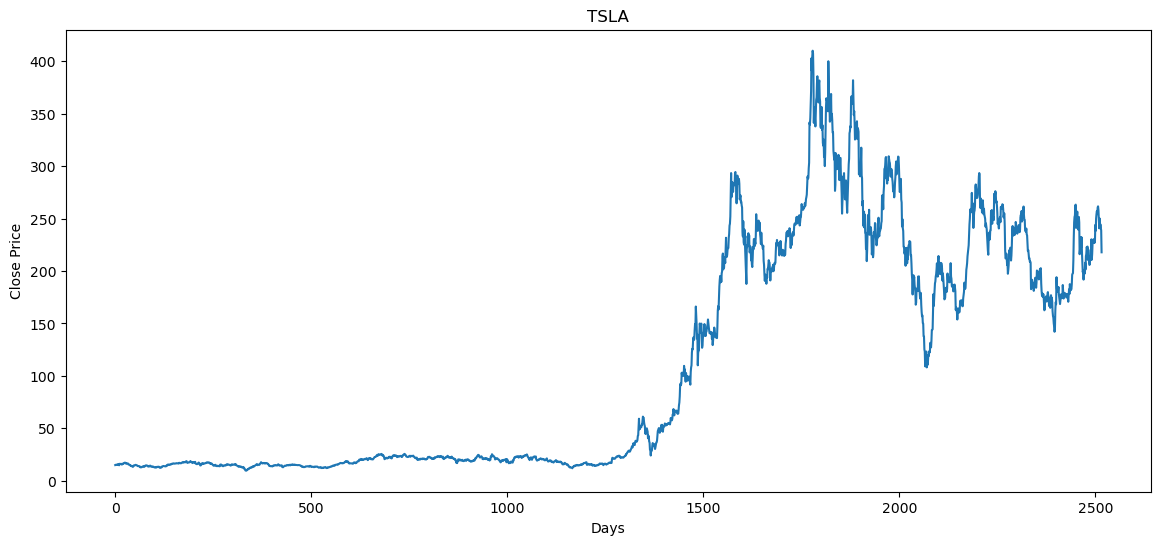

In [95]:
plt.figure(figsize=(14, 6))
plt.plot(df.Close);
plt.title(ticker);
plt.xlabel('Days');
plt.ylabel('Close Price');

# # 3. Feature Engineering

In [96]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [97]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days Moving Average

In [98]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_100
0,2014-10-13,15.904667,15.930667,14.733333,14.972667,14.972667,169030500,NaN
1,2014-10-14,15.216667,15.498000,14.866667,15.137333,15.137333,106579500,NaN
2,2014-10-15,14.666667,15.399333,14.488000,15.313333,15.313333,137209500,NaN
3,2014-10-16,14.648000,15.328000,14.606667,15.090000,15.090000,80989500,NaN
4,2014-10-17,15.558667,15.651333,15.103333,15.165333,15.165333,158241000,NaN


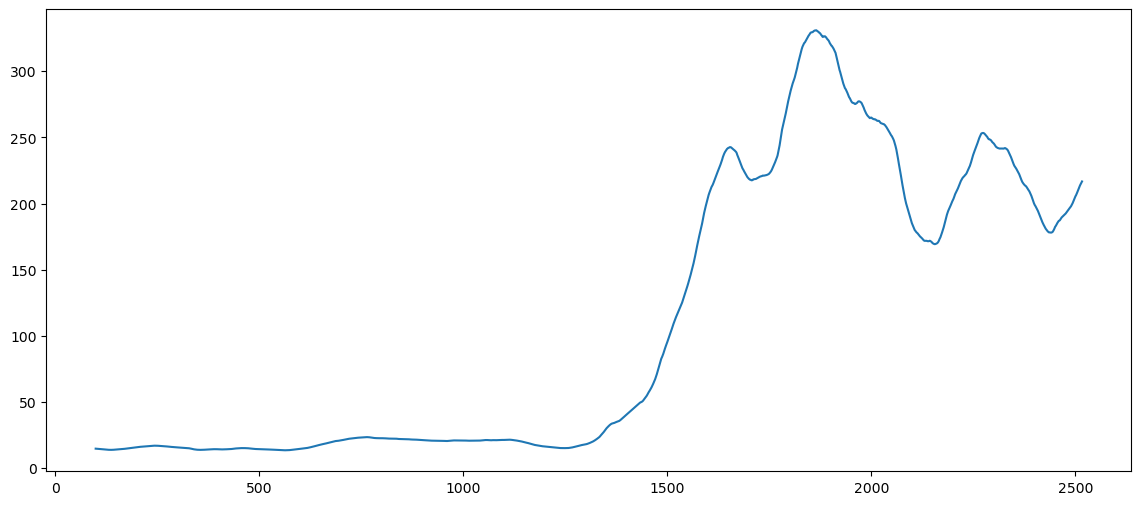

In [99]:
plt.figure(figsize=(14, 6))
plt.plot(df['MA_100'])

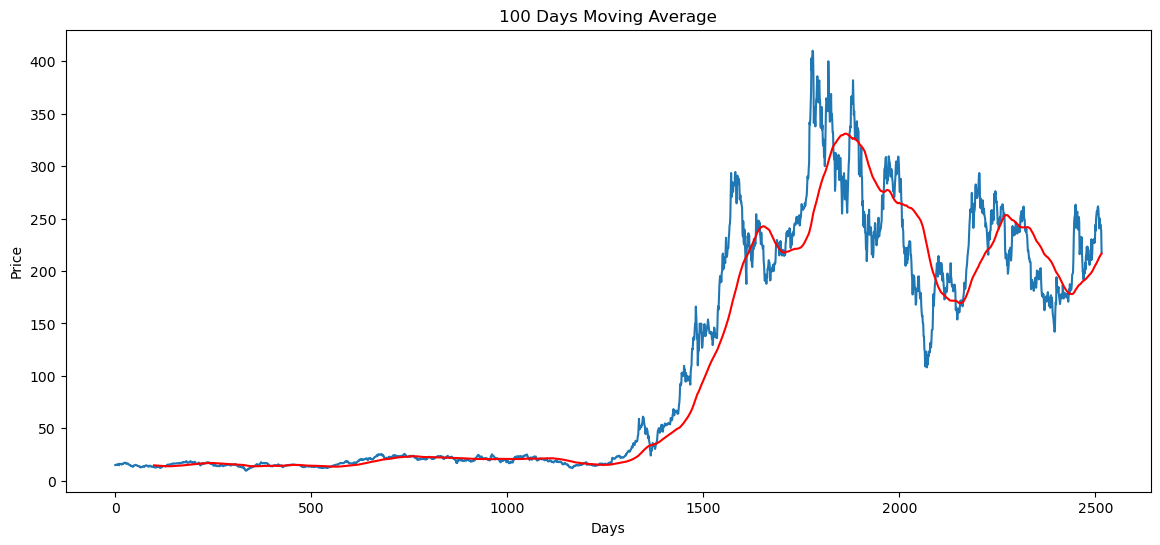

In [100]:
plt.figure(figsize=(14, 6))
plt.plot(df.Close);
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average');
plt.xlabel('Days');
plt.ylabel('Price');

### 200 days Moving Average

In [101]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

,Date,Open,High,Low,Close,Adj Close,Volume,MA_100,MA_200
0,2014-10-13,15.904667,15.930667,14.733333,14.972667,14.972667,169030500,NaN,NaN
1,2014-10-14,15.216667,15.498000,14.866667,15.137333,15.137333,106579500,NaN,NaN
2,2014-10-15,14.666667,15.399333,14.488000,15.313333,15.313333,137209500,NaN,NaN
3,2014-10-16,14.648000,15.328000,14.606667,15.090000,15.090000,80989500,NaN,NaN
4,2014-10-17,15.558667,15.651333,15.103333,15.165333,15.165333,158241000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
198,2015-07-28,17.049999,17.693333,16.789333,17.654667,17.654667,58437000,15.663040,NaN
199,2015-07-29,17.618000,17.859333,17.466667,17.587999,17.587999,41851500,15.709667,15.202463
200,2015-07-30,17.512667,17.796000,17.474001,17.785999,17.785999,30519000,15.760273,15.216530
201,2015-07-31,17.840000,17.957333,17.674667,17.743334,17.743334,33339000,15.810827,15.229560


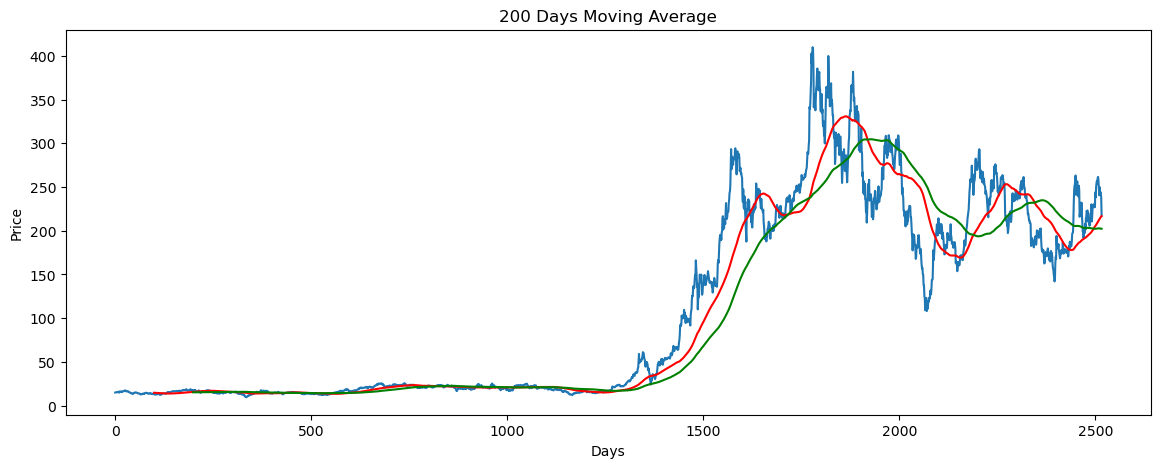

In [102]:
plt.figure(figsize=(14, 5))
plt.plot(df.Close);
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average');
plt.xlabel('Days');
plt.ylabel('Price');

### Calculating % changed in each trading session

In [103]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

,Close,Percentage Changed
0,14.972667,NaN
1,15.137333,0.010998
2,15.313333,0.011627
3,15.090000,-0.014584
4,15.165333,0.004992
...,...,...
2512,240.830002,-0.036988
2513,244.500000,0.015239
2514,241.050003,-0.014110
2515,238.770004,-0.009459


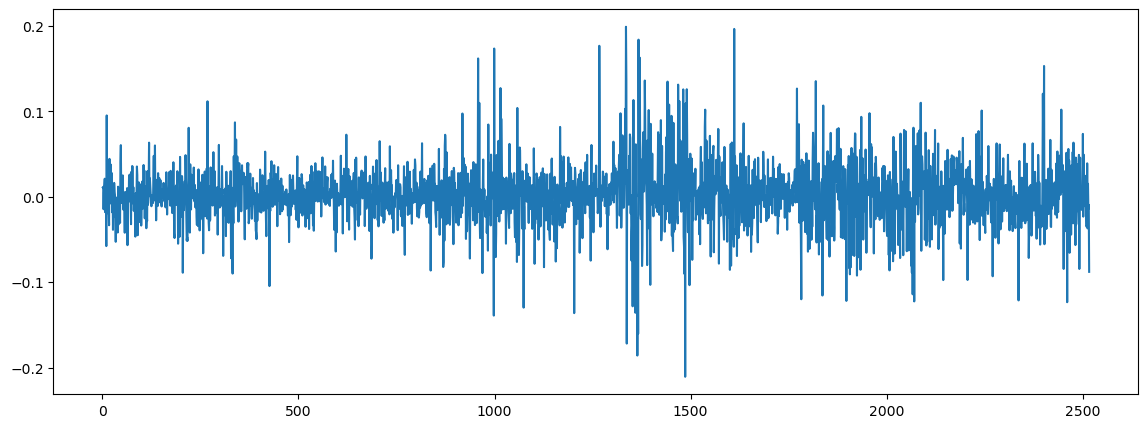

In [104]:
plt.figure(figsize=(14, 5))
plt.plot(df['Percentage Changed']);

# 4. Data Processing

In [105]:
df.shape

(2517, 10)

In [106]:
# Sélectionner uniquement la colonne "Close" pour la prédiction
data = df[['Close']].values

In [107]:
data

array([[ 14.97266674],
       [ 15.13733292],
       [ 15.31333256],
       ...,
       [241.05000305],
       [238.77000427],
       [217.80000305]])

In [108]:
type(data)

numpy.ndarray

# Scaling down the data between 0 & 1

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [110]:
data_training_array = scaler.fit_transform(data)
data_training_array

array([[0.01347346],
       [0.01388473],
       [0.01432429],
       ...,
       [0.57811345],
       [0.57241904],
       [0.52004536]])

In [111]:
type(data_training_array)

numpy.ndarray

In [112]:
data_training_array.shape

(2517, 1)

# 5. Sequence Creation

In [113]:
# Définir la taille de la fenêtre (nombre de jours précédents utilisés pour prédire le jour suivant)
window_size = 100

In [114]:
# Fonction pour créer les ensembles d'entraînement à partir des données
def create_dataset(data_training_array, window_size):
    x, y = [], []
    for i in range(window_size, data_training_array.shape[0]):
        x.append(data_training_array[i-window_size:i, 0])  # Entrées: les "window_size" jours précédents
        y.append(data_training_array[i, 0])  # Sortie: le jour actuel
    return np.array(x), np.array(y)

In [115]:
# Créer les ensembles d'entraînement
x_train, y_train = create_dataset(data_training_array, window_size)

In [116]:
# Reshape des données pour LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [117]:
x_train

array([[[0.01347346],
        [0.01388473],
        [0.01432429],
        ...,
        [0.00978541],
        [0.00948404],
        [0.00836014]],

       [[0.01388473],
        [0.01432429],
        [0.01376651],
        ...,
        [0.00948404],
        [0.00836014],
        [0.00786063]],

       [[0.01432429],
        [0.01376651],
        [0.01395466],
        ...,
        [0.00836014],
        [0.00786063],
        [0.00776739]],

       ...,

       [[0.41275049],
        [0.41929411],
        [0.41302523],
        ...,
        [0.60066635],
        [0.57756399],
        [0.58673   ]],

       [[0.41929411],
        [0.41302523],
        [0.44212173],
        ...,
        [0.57756399],
        [0.58673   ],
        [0.57811345]],

       [[0.41302523],
        [0.44212173],
        [0.42591261],
        ...,
        [0.58673   ],
        [0.57811345],
        [0.57241904]]])

In [118]:
y_train

array([0.00786063, 0.00776739, 0.00833683, ..., 0.57811345, 0.57241904,
       0.52004536])

In [119]:
x_train.ndim

3

In [120]:
y_train.ndim

1

In [121]:
x_train.shape

(2417, 100, 1)

In [122]:
y_train.shape

(2417,)

# 6. Model Building

In [123]:
# Ml Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, Dropout

In [124]:
model = Sequential()

model.add(Input(shape=(window_size, 1))) # Couche d'entrée
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))  # Dropout après la première LSTM
model.add(LSTM(units=64))
model.add(Dropout(0.2))  # Dropout après la deuxième LSTM
model.add(Dense(25)) # 25 résultats uniques seront produits 
model.add(Dense(1)) # il les combine en une seule sortie. Il donne la prévision finale du prix.

# 7. Model Training

In [125]:
# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')
# Entraîner le modèle sur toutes les données historiques disponibles
model.fit(x_train, y_train, batch_size=64, epochs=50)  # epochs=50 === Lire les données 50 fois

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 221ms/step - loss: 0.0293
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - loss: 0.0023
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - loss: 0.0020
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - loss: 0.0017
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 197ms/step - loss: 0.0016
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - loss: 0.0015
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - loss: 0.0014
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - loss: 0.0015
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step - loss: 0.0012
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 239ms/step - loss: 0.0015
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - loss: 0.0012
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - loss: 0.0012
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - loss: 0.0012
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - loss: 0.0011
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step

In [126]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [127]:
# save the trained model
model.save('future_prediction__model.keras')

# 8. Making Predictions

In [128]:
# Supposons que 'model' soit déjà entraîné et 'scaled_data' contienne les données normalisées.
# 'last_100_days' est la dernière fenêtre de 100 jours des données normalisées que tu as utilisée pour l'entraînement.
last_100_days = data_training_array[-100:]

In [129]:
last_100_days

array([[0.44212173],
       [0.42591261],
       [0.41000321],
       [0.42373975],
       [0.41752083],
       [0.4161222 ],
       [0.42261582],
       [0.42084258],
       [0.41637194],
       [0.41257569],
       [0.41315011],
       [0.42049292],
       [0.41934403],
       [0.41012806],
       [0.40231074],
       [0.41886949],
       [0.43180683],
       [0.42066773],
       [0.44421967],
       [0.43777598],
       [0.42955905],
       [0.43315549],
       [0.43208156],
       [0.4439949 ],
       [0.46652279],
       [0.46914523],
       [0.47029412],
       [0.50021479],
       [0.5536624 ],
       [0.59145038],
       [0.60426283],
       [0.60780935],
       [0.63126133],
       [0.63358411],
       [0.57806349],
       [0.59604586],
       [0.60706008],
       [0.61685048],
       [0.59672021],
       [0.59854341],
       [0.57349297],
       [0.60423783],
       [0.59142541],
       [0.5155248 ],
       [0.52616436],
       [0.52504047],
       [0.55576037],
       [0.532

In [130]:
type(last_100_days)

numpy.ndarray

In [131]:
last_100_days.shape

(100, 1)

In [132]:
predictions = []

# Effectuer 100 prédictions
for _ in range(100):
    # Reshape pour que le modèle accepte les données
    x_input = last_100_days.reshape(1, -1, 1)  # Reshape en (1, 100, 1)
    
    # Faire la prédiction
    predicted_price = model.predict(x_input)
    
    # Ajouter la prédiction à la liste
    predictions.append(predicted_price[0, 0])
    
    # Mettre à jour la fenêtre de données pour la prochaine prédiction
    last_100_days = np.append(last_100_days, predicted_price)[-100:]  # Garder les 100 derniers jours (incluant la nouvelle prédiction)
    # Inverse la normalisation si nécessaire (si tu as normalisé tes données au préalable)
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━

AttributeError: 'list' object has no attribute 'reshape'

In [133]:
predicted_prices

array([143.49713, 143.39842, 143.30014, 143.20224, 143.10474, 143.00763,
       142.91093, 142.8146 , 142.71867, 142.6231 , 142.52795, 142.43317,
       142.33875, 142.24474, 142.15106, 142.05777, 141.96484, 141.87228,
       141.78012, 141.68828, 141.59682, 141.50569, 141.41496, 141.32454,
       141.23451, 141.1448 , 141.05544, 140.96645, 140.87778, 140.78946,
       140.70149, 140.61382, 140.52652, 140.43954, 140.35289, 140.2666 ,
       140.18059, 140.09494, 140.00961, 139.92459, 139.83989, 139.75552,
       139.67146, 139.58769, 139.50427, 139.42114, 139.33833, 139.25583,
       139.17363, 139.09172, 139.01015, 138.92883, 138.84784, 138.76715,
       138.68675, 138.60664, 138.52681, 138.44728, 138.36806, 138.28911,
       138.21045, 138.13206, 138.05397, 137.97615, 137.89864, 137.82137,
       137.74437, 137.66768, 137.59125, 137.51509, 137.43921, 137.36359,
       137.28824, 137.21315, 137.13834, 137.06378, 136.98949, 136.91547,
       136.84169, 136.76817, 136.6949 , 136.6219 , 

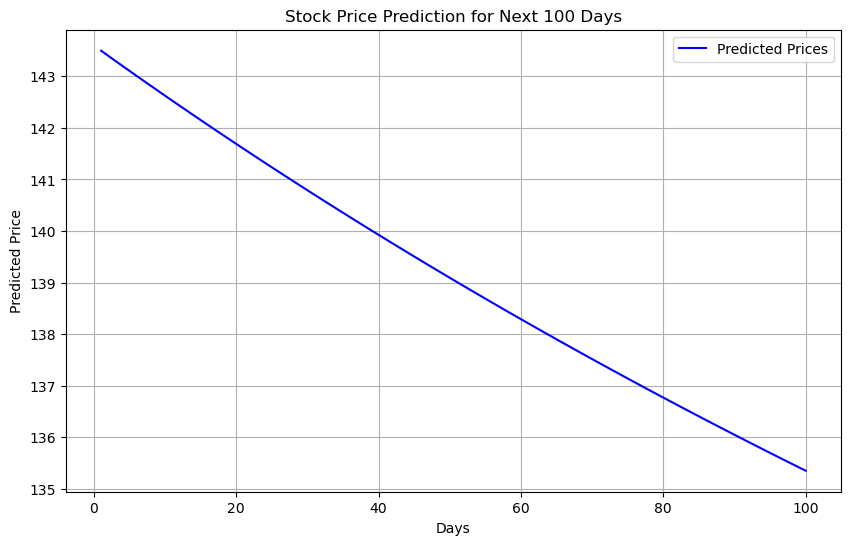

In [135]:
# Exemple d'index temporel si tu prédis sur 100 jours à partir d'une date donnée
days = np.arange(1, 101)  # 100 jours prédits

# Tracer les prix prédits
plt.figure(figsize=(10, 6))  # Taille du graphique
plt.plot(days, predicted_prices, label='Predicted Prices', color='blue')

# Ajouter un titre et des labels aux axes
plt.title('Stock Price Prediction for Next 100 Days')
plt.xlabel('Days')
plt.ylabel('Predicted Price')

# Afficher la légende
plt.legend()

# Afficher la grille (optionnel)
plt.grid(True)

# Afficher le graphique
plt.show()